In [1]:
import pandas as pd

train_df = pd.read_csv('data/features/feat_train_total_msrp.csv')
test_df = pd.read_csv('data/features/feat_test_total_msrp.csv')
test_100_df = pd.read_csv('data/features/feat_test_100_total_msrp.csv')

In [2]:
train_df = train_df[['amr1','amr2','feat_smatch','label']]
test_100_df = test_100_df[['amr1','amr2','feat_smatch','label']]
test_df = test_df[['amr1','amr2','feat_smatch','label']]

In [3]:
import penman

def extract_concepts(amr):
    graph = penman.decode(amr)
    words = [node[2] for node in graph.instances()]
    # words = [word.replace('-', '').rstrip('0123456789') for word in words]
    for triple in graph.triples:
        if triple[1].startswith((":op", ":time")):
            if triple[2][0] == "z" and not triple[2][1:].isdigit():
                words.append(triple[2])
            elif triple[2][0] != "z":
                words.append(triple[2])
        elif triple[1].startswith(":wiki") and triple[2] != "-":
            words.append(triple[2])
    return words

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score   

def extract_feat(df_train, df_test, inductive=True):
    if inductive:
        all_sentences = np.concatenate([df_train['concepts_amr1'], df_train['concepts_amr2']])
    else:
        all_sentences = np.concatenate([df_train['concepts_amr1'], df_train['concepts_amr2'],
                                        df_test['concepts_amr1'], df_test['concepts_amr2']])
    vec = CountVectorizer(binary=True, token_pattern=r'\b\w[\w-]*\b')
    vec.fit(all_sentences)
    
    X1_train = vec.transform(df_train['concepts_amr1']).toarray()
    X2_train = vec.transform(df_train['concepts_amr2']).toarray()
    
    X1_test = vec.transform(df_test['concepts_amr1']).toarray()
    X2_test = vec.transform(df_test['concepts_amr2']).toarray()
    
    feat_1_train = [jaccard_score(x1, x2, average='binary') for x1, x2 in zip(X1_train, X2_train)]
    feat_1_test = [jaccard_score(x1, x2, average='binary') for x1, x2 in zip(X1_test, X2_test)]
    
    df_feat_train = pd.DataFrame(feat_1_train, columns=['Jaccard_Score'])
    df_feat_train['label'] = df_train['label']
    df_feat_train['feat_smatch'] = df_train['feat_smatch']
    
    df_feat_test = pd.DataFrame(feat_1_test, columns=['Jaccard_Score'])
    df_feat_test['label'] = df_test['label']
    df_feat_test['feat_smatch'] = df_test['feat_smatch']
    
    return df_feat_train, df_feat_test


In [4]:
train_df['concepts_amr1'] = train_df['amr1'].apply(extract_concepts)
train_df['concepts_amr2'] = train_df['amr2'].apply(extract_concepts)
train_df['concepts_amr1'] = train_df['concepts_amr1'].apply(' '.join)
train_df['concepts_amr2'] = train_df['concepts_amr2'].apply(' '.join)

test_100_df['concepts_amr1'] = test_100_df['amr1'].apply(extract_concepts)
test_100_df['concepts_amr2'] = test_100_df['amr2'].apply(extract_concepts)
test_100_df['concepts_amr1'] = test_100_df['concepts_amr1'].apply(' '.join)
test_100_df['concepts_amr2'] = test_100_df['concepts_amr2'].apply(' '.join)

test_df['concepts_amr1'] = test_df['amr1'].apply(extract_concepts)
test_df['concepts_amr2'] = test_df['amr2'].apply(extract_concepts)
test_df['concepts_amr1'] = test_df['concepts_amr1'].apply(' '.join)
test_df['concepts_amr2'] = test_df['concepts_amr2'].apply(' '.join)


cannot deinvert attribute: ('z8', ':part-of', 'z5')
ignoring epigraph data for duplicate triple: ('z3', ':wiki', '-')
ignoring epigraph data for duplicate triple: ('z0', ':ARG0', 'z1')
ignoring epigraph data for duplicate triple: ('z7', ':wiki', '-')
ignoring epigraph data for duplicate triple: ('z3', ':wiki', '-')
ignoring epigraph data for duplicate triple: ('z3', ':wiki', '-')
ignoring epigraph data for duplicate triple: ('z1005', ':op1', '"entitas-laju"')
ignoring epigraph data for duplicate triple: ('z1005', ':value', '"entitas-ordinal"')
ignoring epigraph data for duplicate triple: ('z1005', ':value', '"entitas-ordinal"')
ignoring epigraph data for duplicate triple: ('z1005', ':value', '"entitas-ordinal"')
ignoring epigraph data for duplicate triple: ('z1005', ':value', '"entitas-ordinal"')
ignoring epigraph data for duplicate triple: ('z1005', ':value', '"entitas-ordinal"')
ignoring epigraph data for duplicate triple: ('z1033', ':op1', '"entitas-lajualannama"')
ignoring epigraph

In [9]:
train, test = extract_feat(train_df, test_100_df, inductive=True)

X_train = train.drop(columns=['label'])
y_train = train['label']

[I 2024-06-21 11:29:04,281] A new study created in memory with name: no-name-2b5786cb-7baf-42a9-97ed-9771c4c3aa4e
[I 2024-06-21 11:29:09,084] Trial 0 finished with value: 0.5798473104641723 and parameters: {'svc__C': 1.0, 'svc__kernel': 'linear', 'svc__gamma': 1.0, 'svc__degree': 3}. Best is trial 0 with value: 0.5798473104641723.
[I 2024-06-21 11:29:13,604] Trial 1 finished with value: 0.5254655593102404 and parameters: {'svc__C': 0.6967897346979598, 'svc__kernel': 'rbf', 'svc__gamma': 0.001, 'svc__degree': 3}. Best is trial 0 with value: 0.5798473104641723.
[I 2024-06-21 11:29:15,570] Trial 2 finished with value: 0.2716743087178076 and parameters: {'svc__C': 0.012529189179628397, 'svc__kernel': 'poly', 'svc__gamma': 0.54527323008558, 'svc__degree': 3}. Best is trial 0 with value: 0.5798473104641723.
[I 2024-06-21 11:29:17,278] Trial 3 finished with value: 0.5705194184782931 and parameters: {'svc__C': 0.011277915133081335, 'svc__kernel': 'linear', 'svc__gamma': 3.1279540304303897, 'sv

Akurasi: 0.598
Presisi: 0.607
Recall: 0.622
F1 validasi: 0.589
Confusion Matrix:
[[183  82]
 [246 305]]


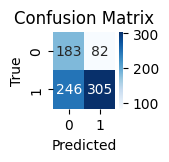

{'svc__C': 0.4616354472444982, 'svc__kernel': 'linear', 'svc__gamma': 0.00015204960878458844, 'svc__degree': 3}


In [11]:
gs, model = find_best_param_svm(X_train, y_train, n_trials=100, timeout=300)

[I 2024-06-21 11:33:52,132] A new study created in memory with name: no-name-b2f9fd47-365c-4d32-993c-c34782fbebb9
[I 2024-06-21 11:33:53,467] Trial 0 finished with value: 0.5798473104641723 and parameters: {'svc__C': 1.0, 'svc__kernel': 'linear', 'svc__gamma': 1.0, 'svc__degree': 3}. Best is trial 0 with value: 0.5798473104641723.
[I 2024-06-21 11:33:55,307] Trial 1 finished with value: 0.5824453354720459 and parameters: {'svc__C': 0.4616354472444982, 'svc__kernel': 'linear', 'svc__gamma': 0.00015204960878458844, 'svc__degree': 3}. Best is trial 1 with value: 0.5824453354720459.
[I 2024-06-21 11:33:56,881] Trial 2 finished with value: 0.5252134545213838 and parameters: {'svc__C': 0.0010917293167485894, 'svc__kernel': 'linear', 'svc__gamma': 0.4437818718558362, 'svc__degree': 3}. Best is trial 1 with value: 0.5824453354720459.
[I 2024-06-21 11:33:59,383] Trial 3 finished with value: 0.5254655593102404 and parameters: {'svc__C': 0.01901707181289164, 'svc__kernel': 'rbf', 'svc__gamma': 0.

Akurasi: 0.598
Presisi: 0.607
Recall: 0.622
F1 validasi: 0.589
Confusion Matrix:
[[183  82]
 [246 305]]


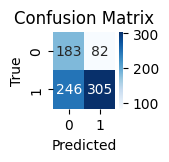

{'svc__C': 0.4616354472444982, 'svc__kernel': 'linear', 'svc__gamma': 0.00015204960878458844, 'svc__degree': 3}


In [15]:
gs, model = find_best_param_svm(X_train, y_train, n_trials=100, timeout=300)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END svc__C=0.4616354472444982, svc__degree=3, svc__gamma=0.00015204960878458844, svc__kernel=linear; total time=   0.8s
[CV] END svc__C=0.4616354472444982, svc__degree=3, svc__gamma=0.00015204960878458844, svc__kernel=linear; total time=   0.8s
[CV] END svc__C=0.4616354472444982, svc__degree=3, svc__gamma=0.00015204960878458844, svc__kernel=linear; total time=   0.7s
[CV] END svc__C=0.4616354472444982, svc__degree=3, svc__gamma=0.00015204960878458844, svc__kernel=linear; total time=   0.6s
[CV] END svc__C=0.4616354472444982, svc__degree=3, svc__gamma=0.00015204960878458844, svc__kernel=linear; total time=   0.9s
Akurasi: 0.598
Presisi: 0.607
Recall: 0.622
F1 validasi: 0.589
Confusion Matrix:
[[183  82]
 [246 305]]


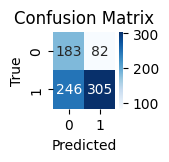

In [6]:
import classifiers.svm as svm

param = {'svc__C': 0.4616354472444982, 'svc__kernel': 'linear', 'svc__gamma': 0.00015204960878458844, 'svc__degree': 3}
param = {k: [v] for k,v in param.items()}
_,_ = svm.fit_train_svm(X_train, y_train, param)

[I 2024-08-01 17:16:36,399] A new study created in memory with name: no-name-b07c74ed-5db1-4ae1-a4ec-727fadc45855
[I 2024-08-01 17:16:36,599] Trial 0 finished with value: 0.6287866657610734 and parameters: {'xgbclassifier__eta': 0.3, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 6, 'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__subsample': 1.0, 'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__gamma': 0.0, 'xgbclassifier__reg_lambda': 1.0, 'xgbclassifier__objective': 'reg:squarederror'}. Best is trial 0 with value: 0.6287866657610734.
[I 2024-08-01 17:16:37,197] Trial 1 finished with value: 0.6364057057526374 and parameters: {'xgbclassifier__eta': 0.15983855246317744, 'xgbclassifier__n_estimators': 702, 'xgbclassifier__max_depth': 8, 'xgbclassifier__learning_rate': 0.17383162231081462, 'xgbclassifier__subsample': 0.7730676427555971, 'xgbclassifier__colsample_bytree': 0.8488225764245229, 'xgbclassifier__min_child_weight

Akurasi: 0.678
Presisi: 0.670
Recall: 0.693
F1 validasi: 0.664
Confusion Matrix:
[[195  70]
 [193 358]]


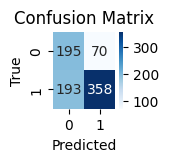

{'xgbclassifier__eta': 0.2681551925312165, 'xgbclassifier__n_estimators': 384, 'xgbclassifier__max_depth': 7, 'xgbclassifier__learning_rate': 0.09082430116055963, 'xgbclassifier__subsample': 0.9185968590319185, 'xgbclassifier__colsample_bytree': 0.6001232444459134, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__gamma': 2.917642499443518, 'xgbclassifier__reg_lambda': 7.632951527086445, 'xgbclassifier__objective': 'reg:squarederror'}


In [24]:
import classifiers.xgb as xgb

gs, model = xgb.find_best_param_xgb(X_train, y_train, n_trials=500)


[I 2024-06-21 11:42:01,676] A new study created in memory with name: no-name-989dca9d-c34b-4faf-b905-72778bad3b94
[I 2024-06-21 11:42:02,084] Trial 0 finished with value: 0.5361491939571353 and parameters: {'xgbclassifier__eta': 0.3, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 6, 'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__subsample': 1.0, 'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__gamma': 0.0, 'xgbclassifier__reg_lambda': 1.0, 'xgbclassifier__objective': 'reg:squarederror'}. Best is trial 0 with value: 0.5361491939571353.
[I 2024-06-21 11:42:03,157] Trial 1 finished with value: 0.5855076389474659 and parameters: {'xgbclassifier__eta': 0.030398745850003638, 'xgbclassifier__n_estimators': 452, 'xgbclassifier__max_depth': 3, 'xgbclassifier__learning_rate': 0.010069396678696734, 'xgbclassifier__subsample': 0.755102211406734, 'xgbclassifier__colsample_bytree': 0.7892586625055392, 'xgbclassifier__min_child_weigh

Akurasi: 0.625
Presisi: 0.606
Recall: 0.619
F1 validasi: 0.604
Confusion Matrix:
[[160 105]
 [201 350]]


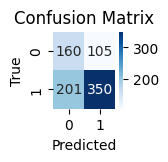

{'xgbclassifier__eta': 0.030398745850003638, 'xgbclassifier__n_estimators': 452, 'xgbclassifier__max_depth': 3, 'xgbclassifier__learning_rate': 0.010069396678696734, 'xgbclassifier__subsample': 0.755102211406734, 'xgbclassifier__colsample_bytree': 0.7892586625055392, 'xgbclassifier__min_child_weight': 8, 'xgbclassifier__gamma': 2.473382794007097, 'xgbclassifier__reg_lambda': 3.874633458837325, 'xgbclassifier__objective': 'binary:hinge'}


In [20]:
gs, model = find_best_param_xgb(X_train, y_train, n_trials=100, timeout=300)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END xgbclassifier__colsample_bytree=0.7892586625055392, xgbclassifier__eta=0.030398745850003638, xgbclassifier__gamma=2.473382794007097, xgbclassifier__learning_rate=0.010069396678696734, xgbclassifier__max_depth=3, xgbclassifier__min_child_weight=8, xgbclassifier__n_estimators=452, xgbclassifier__objective=binary:hinge, xgbclassifier__reg_lambda=3.874633458837325, xgbclassifier__subsample=0.755102211406734; total time=   1.4s
[CV] END xgbclassifier__colsample_bytree=0.7892586625055392, xgbclassifier__eta=0.030398745850003638, xgbclassifier__gamma=2.473382794007097, xgbclassifier__learning_rate=0.010069396678696734, xgbclassifier__max_depth=3, xgbclassifier__min_child_weight=8, xgbclassifier__n_estimators=452, xgbclassifier__objective=binary:hinge, xgbclassifier__reg_lambda=3.874633458837325, xgbclassifier__subsample=0.755102211406734; total time=   0.6s
[CV] END xgbclassifier__colsample_bytree=0.7892586625055392, xgbclass

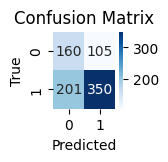

In [10]:
import classifiers.xgb as xgb

param = {'xgbclassifier__eta': 0.030398745850003638, 'xgbclassifier__n_estimators': 452, 'xgbclassifier__max_depth': 3, 'xgbclassifier__learning_rate': 0.010069396678696734, 'xgbclassifier__subsample': 0.755102211406734, 'xgbclassifier__colsample_bytree': 0.7892586625055392, 'xgbclassifier__min_child_weight': 8, 'xgbclassifier__gamma': 2.473382794007097, 'xgbclassifier__reg_lambda': 3.874633458837325, 'xgbclassifier__objective': 'binary:hinge'}
param = {k: [v] for k,v in param.items()}
_, model = xgb.fit_train_xgb(X_train, y_train, param)

In [11]:
import joblib

joblib.dump(model, 'model/best_model_smatch_js.pkl')

['model/best_model_smatch_js.pkl']

In [5]:
train, test = extract_feat(train_df, test_100_df, inductive=True)

X_train = train.drop(columns=['label'])
y_train = train['label']

X_test = test.drop(columns=['label'])
y_test = test['label']

Akurasi: 0.625
Presisi: 0.606
Recall: 0.619
F1 validasi: 0.604
Confusion Matrix:
[[160 105]
 [201 350]]


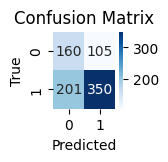

In [6]:
import joblib

from utils.evaluation_matrics import print_validasi, print_score_uji
best_pipeline = joblib.load('model/best_model_smatch_js.pkl')

print_validasi(best_pipeline, X_train, y_train)

In [8]:
train, test = extract_feat(train_df, test_100_df, inductive=True)

X_train = train.drop(columns=['label'])
y_train = train['label']

X_test = test.drop(columns=['label'])
y_test = test['label']

y_pred = best_pipeline.predict(X_test)
print_score_uji(y_test, y_pred, best_pipeline)

Akurasi model terbaik: 0.590
Precision model terbaik: 0.588
Recall model terbaik: 0.589
F1 pengujian model terbaik: 0.588
Confusion Matrix:
[[26 19]
 [22 33]]


In [9]:
test.to_csv('data/features/feat_exp_2_c_test_100.csv', index=False)

In [17]:
train, test = extract_feat(train_df, test_100_df, inductive=False)

X_train = train.drop(columns=['label'])
y_train = train['label']

X_test = test.drop(columns=['label'])
y_test = test['label']

y_pred = best_pipeline.predict(X_test)
print_score_uji(y_test, y_pred, best_pipeline)

Akurasi model terbaik: 0.550
Precision model terbaik: 0.552
Recall model terbaik: 0.553
F1 pengujian model terbaik: 0.550
Confusion Matrix:
[[26 19]
 [26 29]]


In [10]:
train, test = extract_feat(train_df, test_df, inductive=True)

X_train = train.drop(columns=['label'])
y_train = train['label']

X_test = test.drop(columns=['label'])
y_test = test['label']

y_pred = best_pipeline.predict(X_test)
print_score_uji(y_test, y_pred, best_pipeline)

Akurasi model terbaik: 0.623
Precision model terbaik: 0.598
Recall model terbaik: 0.607
F1 pengujian model terbaik: 0.598
Confusion Matrix:
[[323 255]
 [395 752]]


In [12]:
train.to_csv('data/features/feat_exp_2_c_train.csv', index=False)
test.to_csv('data/features/feat_exp_2_c_test.csv', index=False)

In [19]:
train, test = extract_feat(train_df, test_df, inductive=False)

X_train = train.drop(columns=['label'])
y_train = train['label']

X_test = test.drop(columns=['label'])
y_test = test['label']

y_pred = best_pipeline.predict(X_test)
print_score_uji(y_test, y_pred, best_pipeline)

Akurasi model terbaik: 0.610
Precision model terbaik: 0.591
Recall model terbaik: 0.601
F1 pengujian model terbaik: 0.589
Confusion Matrix:
[[330 248]
 [424 723]]


[I 2024-06-21 11:44:42,356] A new study created in memory with name: no-name-e7313f8b-bd4a-4ae7-9aea-f28efbee5399
[I 2024-06-21 11:44:45,654] Trial 0 finished with value: 0.5461778114280864 and parameters: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 100, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 1000, 'randomforestclassifier__bootstrap': True}. Best is trial 0 with value: 0.5461778114280864.
[I 2024-06-21 11:45:01,868] Trial 1 finished with value: 0.563033601401989 and parameters: {'randomforestclassifier__n_estimators': 687, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 56, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_leaf_nodes': 257, 'randomforestclassifier__bootstrap': True}. Best is trial 1 with value: 0.563033601401989.
[I 2024-06-21 11:45:03,539] Trial 2 finished with value: 0.57

Akurasi: 0.583
Presisi: 0.583
Recall: 0.595
F1 validasi: 0.570
Confusion Matrix:
[[166  99]
 [241 310]]


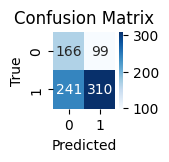

{'randomforestclassifier__n_estimators': 104, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 26, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 70, 'randomforestclassifier__bootstrap': True}


In [22]:
gs, model = find_best_param_rf(X_train, y_train, n_trials=100, timeout=300)

[I 2024-06-21 12:32:49,160] A new study created in memory with name: no-name-e5eacb0e-5f97-475e-8795-35c525bad295
[I 2024-06-21 12:32:54,837] Trial 0 finished with value: 0.5461778114280864 and parameters: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 100, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 1000, 'randomforestclassifier__bootstrap': True}. Best is trial 0 with value: 0.5461778114280864.
[I 2024-06-21 12:32:57,502] Trial 1 finished with value: 0.5722847823362744 and parameters: {'randomforestclassifier__n_estimators': 104, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 26, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 70, 'randomforestclassifier__bootstrap': True}. Best is trial 1 with value: 0.5722847823362744.
[I 2024-06-21 12:33:05,701] Trial 2 finished with value: 0.5675

Akurasi: 0.581
Presisi: 0.575
Recall: 0.585
F1 validasi: 0.565
Confusion Matrix:
[[158 107]
 [235 316]]


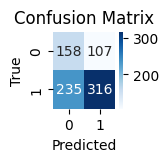

{'randomforestclassifier__n_estimators': 36, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 57, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 81, 'randomforestclassifier__bootstrap': True}


In [24]:
gs, model = find_best_param_rf(X_train, y_train, n_trials=100, timeout=300)


[I 2024-06-21 12:41:46,537] A new study created in memory with name: no-name-ec287d99-297b-4d80-a6c5-a54d1c88436a
[I 2024-06-21 12:41:47,960] Trial 0 finished with value: 0.5461778114280864 and parameters: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 100, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 1000, 'randomforestclassifier__bootstrap': True}. Best is trial 0 with value: 0.5461778114280864.
[I 2024-06-21 12:41:49,317] Trial 1 finished with value: 0.5722847823362744 and parameters: {'randomforestclassifier__n_estimators': 104, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 26, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 70, 'randomforestclassifier__bootstrap': True}. Best is trial 1 with value: 0.5722847823362744.
[I 2024-06-21 12:41:49,784] Trial 2 finished with value: 0.5788

Akurasi: 0.581
Presisi: 0.575
Recall: 0.585
F1 validasi: 0.565
Confusion Matrix:
[[158 107]
 [235 316]]


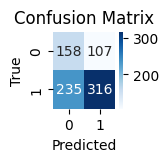

{'randomforestclassifier__n_estimators': 36, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 57, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 81, 'randomforestclassifier__bootstrap': True}


In [26]:
gs, model = find_best_param_rf(X_train, y_train, n_trials=100, timeout=300)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END randomforestclassifier__bootstrap=True, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=26, randomforestclassifier__max_features=log2, randomforestclassifier__max_leaf_nodes=70, randomforestclassifier__n_estimators=104; total time=   0.5s
[CV] END randomforestclassifier__bootstrap=True, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=26, randomforestclassifier__max_features=log2, randomforestclassifier__max_leaf_nodes=70, randomforestclassifier__n_estimators=104; total time=   0.5s
[CV] END randomforestclassifier__bootstrap=True, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=26, randomforestclassifier__max_features=log2, randomforestclassifier__max_leaf_nodes=70, randomforestclassifier__n_estimators=104; total time=   0.5s
[CV] END randomforestclassifier__bootstrap=True, randomforestclassifier__criterion=gini, randomforestclassifier__max_de

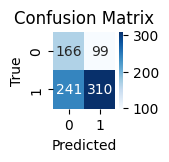

In [8]:
import classifiers.rf as rf

param = {'randomforestclassifier__n_estimators': 104, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 26, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 70, 'randomforestclassifier__bootstrap': True}
param = {k: [v] for k,v in param.items()}
_,_ = rf.fit_train_rf(X_train, y_train, param)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=0.9720057390916502, lgbmclassifier__learning_rate=0.2805012952656758, lgbmclassifier__max_depth=14, lgbmclassifier__min_data_in_leaf=44, lgbmclassifier__n_estimators=694, lgbmclassifier__num_leaves=69, lgbmclassifier__reg_alpha=9.810893980121373, lgbmclassifier__reg_lambda=8.102935066297498, lgbmclassifier__subsample=0.5411477619749593; total time=   0.2s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=0.9720057390916502, lgbmclassifier__learning_rate=0.2805012952656758, lgbmclassifier__max_depth=14, lgbmclassifier__min_data_in_leaf=44, lgbmclassifier__n_estimators=694, lgbmclassifier__num_leaves=69, lgbmclassifier__reg_alpha=9.810893980121373, lgbmclassifier__reg_lambda=8.102935066297498, lgbmclassifier__subsample=0.5411477619749593; total time=   0.1s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=0.9720

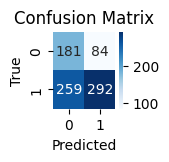

In [9]:
import classifiers.lgbm as lgbm

param = {'lgbmclassifier__num_leaves': 69, 'lgbmclassifier__min_data_in_leaf': 44, 'lgbmclassifier__max_depth': 14, 'lgbmclassifier__learning_rate': 0.2805012952656758, 'lgbmclassifier__n_estimators': 694, 'lgbmclassifier__subsample': 0.5411477619749593, 'lgbmclassifier__colsample_bytree': 0.9720057390916502, 'lgbmclassifier__reg_alpha': 9.810893980121373, 'lgbmclassifier__reg_lambda': 8.102935066297498, 'lgbmclassifier__boosting': 'gbdt'}
param = {k: [v] for k,v in param.items()}
_,_ = lgbm.fit_train_lgbm(X_train, y_train, param)